In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(-10,10,100).reshape(-1,1)

In [3]:
y = 0.1 * x**4 + 1.2 * x**3 + 1.2 * x**2 + 2.1 * x 

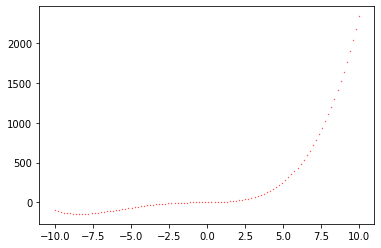

In [4]:
plt.scatter(x,y,color='r',s=0.1)

https://pytorch.org/docs/stable/generated/torch.nn.Module.html <br>
https://pytorch.org/docs/stable/nn.html

In [5]:
class MyModel(nn.Module):
    def __init__(self,size):
        super(MyModel, self).__init__()
        self.layer1 = torch.nn.Linear(1,size)
        self.layer2 = torch.nn.Linear(size,1)
        
    def forward(self,x):
        l1 = torch.relu(self.layer1(x))
        return self.layer2(l1)

In [6]:
my_model = MyModel(10000)

In [7]:
X = torch.tensor(x, dtype=torch.float)

In [8]:
Y = torch.tensor(y, dtype=torch.float)

https://pytorch.org/docs/stable/optim.html

In [9]:
# You need to tell the optimizer what parameters you want to train
optimizer = torch.optim.Adam(my_model.parameters(),lr=0.01)

In [10]:
for t in range(1000):
    optimizer.zero_grad()
    # The following calls the forward method
    output = my_model(X)
    loss = ((output - Y)**2).mean()
    loss.backward()
    optimizer.step()

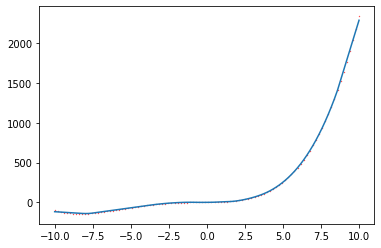

In [12]:
plt.scatter(x,y,color='r',s=0.1)
plt.plot(x,output.detach().numpy())